##  Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv("Pune_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df1 = pd.read_csv("Pune_House_Data.csv")
df1.head()

,area_type,availability,size,society,location,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2 BHK,Coomee,Alandi Road,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,Ambegaon Budruk,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,NaN,Anandnagar,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,Aundh,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,NaN,Aundh Road,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,size,location,total_sqft,bath,price
0,2 BHK,Alandi Road,1056,2.0,39.07
1,4 Bedroom,Ambegaon Budruk,2600,5.0,120.00
2,3 BHK,Anandnagar,1440,2.0,62.00
3,3 BHK,Aundh,1521,3.0,95.00
4,2 BHK,Aundh Road,1200,2.0,51.00


In [6]:
df2.isnull().sum()

size          16
location       1
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

size          0
location      0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df3.head()

,size,location,total_sqft,bath,price,bhk
0,2 BHK,Alandi Road,1056,2.0,39.07,2
1,4 Bedroom,Ambegaon Budruk,2600,5.0,120.00,4
2,3 BHK,Anandnagar,1440,2.0,62.00,3
3,3 BHK,Aundh,1521,3.0,95.00,3
4,2 BHK,Aundh Road,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk>20]

,size,location,total_sqft,bath,price,bhk
1718,27 BHK,Uruli Devachi,8000,27.0,230.0,27
4684,43 Bedroom,Salunke Vihar,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(isfloat)].head()

,size,location,total_sqft,bath,price,bhk
30,4 BHK,Gultekdi,2100 - 2850,4.0,186.000,4
122,4 BHK,Ganeshkhind,3067 - 8156,4.0,477.000,4
137,2 BHK,Khadaki,1042 - 1105,2.0,54.005,2
165,2 BHK,Prabhat Road,1145 - 1340,2.0,43.490,2
188,2 BHK,Wakadewadi,1015 - 1540,2.0,56.800,2


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2146')

2146.0

In [18]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [19]:
df4 = df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,size,location,total_sqft,bath,price,bhk
0,2 BHK,Alandi Road,1056.0,2.0,39.07,2
1,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4
2,3 BHK,Anandnagar,1440.0,2.0,62.00,3
3,3 BHK,Aundh,1521.0,3.0,95.00,3
4,2 BHK,Aundh Road,1200.0,2.0,51.00,2


In [20]:
df4.loc[30]

size             4 BHK
location      Gultekdi
total_sqft        2475
bath                 4
price              186
bhk                  4
Name: 30, dtype: object

### Outlier detection and removal

In [21]:
df5 =df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,size,location,total_sqft,bath,price,bhk,price_per_sqft
0,2 BHK,Alandi Road,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,Anandnagar,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,Aundh,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,Aundh Road,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df5.location.unique())

97

In [23]:
df5.location = df5.location.apply(lambda x:x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Alandi Road             139
Kasba Peth              139
Karve Nagar             139
Paud Road               139
Pirangut                139
Katraj                  139
Pune Railway Station    139
Jangali Maharaj Road    139
Hingne Khurd            139
Laxmi Road              139
Guruwar peth            139
Khadaki                 139
Gokhale Nagar           139
Nana Peth               139
Ganeshkhind             139
Nagar Road              139
Parvati Darshan         139
Aundh Road              139
Erandwane               139
Kharadi                 139
Kondhwa                 139
Deccan Gymkhana         139
Koregaon Park           139
Mangalwar peth          139
Camp                    139
Bund Garden Road        139
Budhwar Peth            139
Baner road              139
Ambegaon Budruk         139
Bibvewadi               139
                       ... 
Narayangaon             138
Navi Peth               138
Manik Bagh              138
Pashan                  138
Prabhat Roa

In [24]:
len(location_stats[location_stats<=10])

1

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
other    1
Name: location, dtype: int64

In [26]:
len(df5.location.unique())

97

In [27]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

97

In [28]:
df5.head(10)

,size,location,total_sqft,bath,price,bhk,price_per_sqft
0,2 BHK,Alandi Road,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4,4615.384615
2,3 BHK,Anandnagar,1440.0,2.0,62.00,3,4305.555556
3,3 BHK,Aundh,1521.0,3.0,95.00,3,6245.890861
4,2 BHK,Aundh Road,1200.0,2.0,51.00,2,4250.000000
5,2 BHK,Balaji Nagar,1170.0,2.0,38.00,2,3247.863248
6,4 BHK,Baner,2732.0,4.0,204.00,4,7467.057101
7,4 BHK,Baner road,3300.0,4.0,600.00,4,18181.818182
8,3 BHK,Bhandarkar Road,1310.0,3.0,63.25,3,4828.244275
9,6 Bedroom,Bhavani Peth,1020.0,6.0,370.00,6,36274.509804


In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,size,location,total_sqft,bath,price,bhk,price_per_sqft
9,6 Bedroom,Bhavani Peth,1020.0,6.0,370.0,6,36274.509804
45,8 Bedroom,Kondhwa Budruk,600.0,9.0,200.0,8,33333.333333
58,6 Bedroom,Mundhawa,1407.0,4.0,150.0,6,10660.980810
68,8 Bedroom,Pirangut,1350.0,7.0,85.0,8,6296.296296
70,3 Bedroom,Pune Railway Station,500.0,3.0,100.0,3,20000.000000


In [30]:
df5.shape

(13246, 7)

In [31]:
#removed total sqft outliers

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [32]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
##removed price_per_sqft outliers
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

In [34]:
##it will remove that values for which 3bhk prices are less than 2bhk mean price 

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7543, 7)

Text(0, 0.5, 'Count')

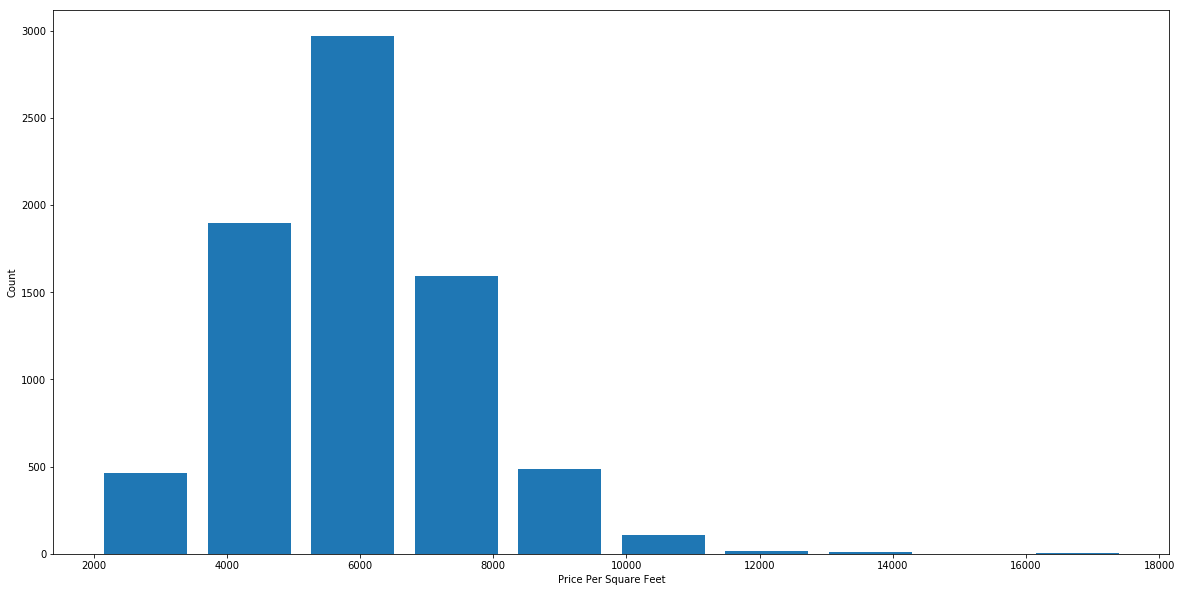

In [35]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [36]:

df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [37]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>10]

,size,location,total_sqft,bath,price,bhk,price_per_sqft
1211,11 BHK,Bibvewadi,6000.0,12.0,150.0,11,2500.000000
2637,10 BHK,Fatima Nagar,12000.0,12.0,525.0,10,4375.000000
5265,13 BHK,Kondhwa Khurd,5425.0,13.0,275.0,13,5069.124424
6350,16 BHK,Model colony,10000.0,16.0,550.0,16,5500.000000
10389,10 BHK,Wagholi,4000.0,12.0,160.0,10,4000.000000


In [38]:
df8[df8.bath>df8.bhk+2]

,size,location,total_sqft,bath,price,bhk,price_per_sqft
772,3 BHK,Baner,1806.0,6.0,116.0,3,6423.034330
3067,6 BHK,Ghorpade Peth,11338.0,9.0,1000.0,6,8819.897689
4231,4 Bedroom,Karve Nagar,7000.0,8.0,450.0,4,6428.571429


In [39]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [40]:
df9.head(2)

,size,location,total_sqft,bath,price,bhk,price_per_sqft
0,2 BHK,Alandi Road,1056.0,2.0,39.07,2,3699.810606
1,4 Bedroom,Alandi Road,2894.0,4.0,245.00,4,8465.791292


In [41]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Alandi Road,1056.0,2.0,39.07,2
1,Alandi Road,2894.0,4.0,245.00,4
2,Alandi Road,1084.0,2.0,50.00,2


## Use One Hot Encoding For Location

In [42]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:

df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,1056.0,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,2894.0,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,1084.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,1230.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,1056.0,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,2894.0,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,1084.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,1230.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model


In [48]:
df12.shape

(7479, 100)

In [49]:
X = df12.drop('price',axis='columns')
X.head()            ##contains independent variable

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [51]:
len(y)


7479

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8234170058419434

In [54]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87729294, 0.87158074, 0.82821585, 0.89763339, 0.8106378 ])

In [55]:
#Find best model using GridSearchCV


from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.857090,{'normalize': True}
1,lasso,0.857851,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.775923,"{'criterion': 'mse', 'splitter': 'random'}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [63]:
#Test the model for few properties
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [64]:
predict_price('Alandi Road',1000, 3, 5)

49.706360816955566

In [68]:
predict_price('Bibvewadi',1000, 1, 2)

52.153987884521484

In [69]:
#Export the tested model to a pickle file

import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [70]:
#Export location and column information to a file that will be useful later on in our prediction application

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_pune.json","w") as f:
    f.write(json.dumps(columns))